<a href="https://colab.research.google.com/github/kschwoerer/r-intro-starter/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 2: Inferential Statistics in Python**
# RPAD 676: Data Science for the Public Good

## Author: Kayla S
## Date: February 13, 2025


In [ ]:
# load libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# load dataset

# Load the CSV file
data = pd.read_csv('digital_services_data.csv')

In [ ]:
# Display the first few rows of the dataframe
data.head()


,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


### Visualize Data

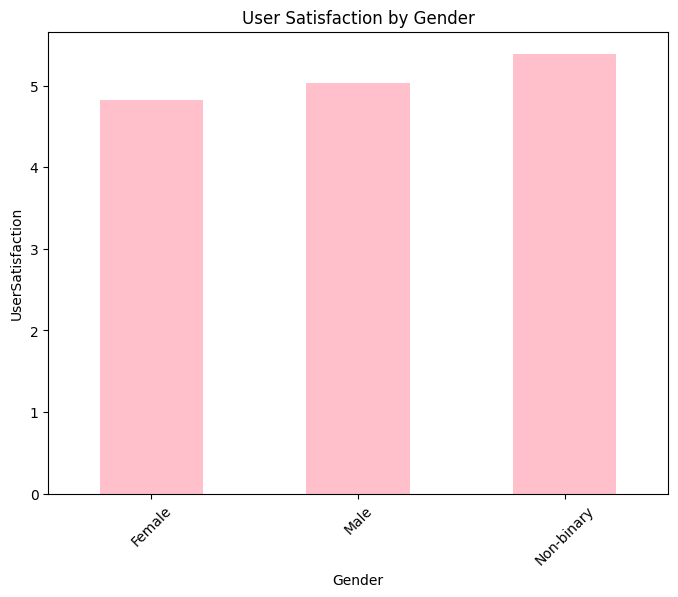

In [ ]:
# Bar Chart
data.groupby('Gender')['UserSatisfaction'].mean().sort_values().plot(kind='bar', color='pink', figsize=(8,6))
plt.xlabel("Gender")
plt.ylabel("UserSatisfaction")
plt.title("User Satisfaction by Gender")
plt.xticks(rotation=45)
plt.show()

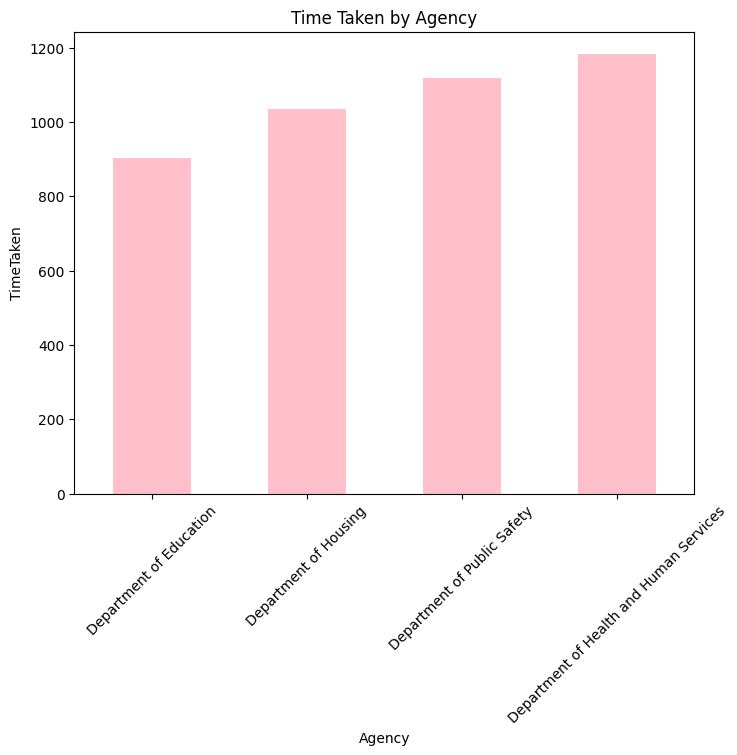

In [ ]:
data.groupby('Agency')['TimeTaken'].mean().sort_values().plot(kind='bar', color='pink', figsize=(8,6))
plt.xlabel("Agency")
plt.ylabel("TimeTaken")
plt.title("Time Taken by Agency")
plt.xticks(rotation=45)
plt.show()

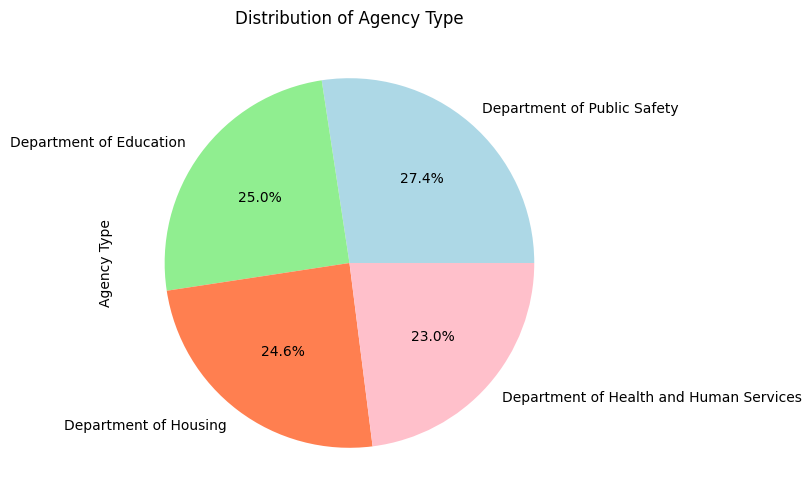

In [ ]:
# Pie Chart
agency_counts = data['Agency'].value_counts()
agency_counts.plot(kind='pie', autopct='%1.1f%%', colors=["lightblue", "lightgreen", "coral", "pink"], figsize=(6,6))
plt.title("Distribution of Agency Type")
plt.ylabel("Agency Type")
plt.show()

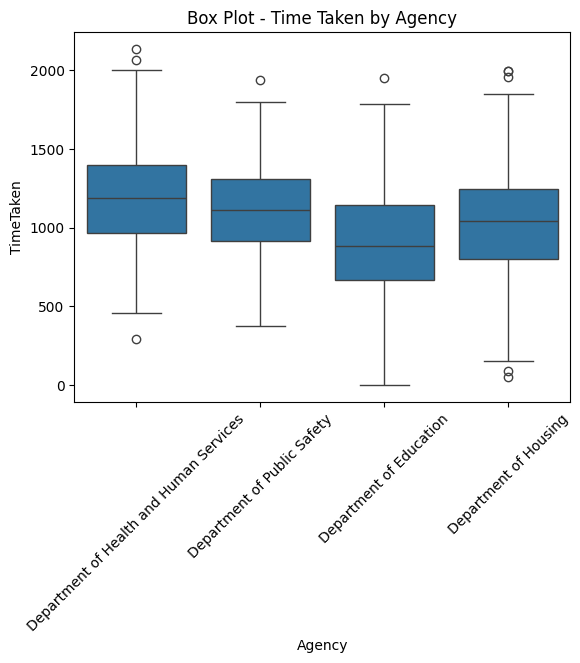

In [ ]:
# Box plot

sns.boxplot(x=data['Agency'], y=data['TimeTaken'])
plt.title("Box Plot - Time Taken by Agency")
plt.xticks(rotation=45)
plt.show()

## Calculating Descriptive Statistics

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

Descriptive Statistics for Numeric Variables:
           user_id    TimeTaken  UserSatisfaction          Age  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean    500.500000  1059.025000          4.946000    49.039000   
std     288.819436   344.668741          2.901293    17.891998   
min       1.000000     0.000000          1.000000    18.000000   
25%     250.750000   830.500000          2.000000    34.000000   
50%     500.500000  1064.000000          5.000000    50.000000   
75%     750.250000  1274.000000          7.000000    64.000000   
max    1000.000000  2136.000000         10.000000    79.000000   

       DisabilityStatus  DigitalLiteracy   ErrorRates  RequestedHelp  \
count       1000.000000      1000.000000  1000.000000    1000.000000   
mean           0.153000         3.053000     2.387000       0.287000   
std            0.360168         1.397907     2.384726       0.452588   
min            0.000000         1.000000     0.000000       0.000000   

In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
descriptive_stats = data.describe().round(2)
print("Descriptive Statistics for Numeric Variables:")
print(descriptive_stats)

Descriptive Statistics for Numeric Variables:
       user_id  TimeTaken  UserSatisfaction      Age  DisabilityStatus  \
count  1000.00    1000.00           1000.00  1000.00           1000.00   
mean    500.50    1059.03              4.95    49.04              0.15   
std     288.82     344.67              2.90    17.89              0.36   
min       1.00       0.00              1.00    18.00              0.00   
25%     250.75     830.50              2.00    34.00              0.00   
50%     500.50    1064.00              5.00    50.00              0.00   
75%     750.25    1274.00              7.00    64.00              0.00   
max    1000.00    2136.00             10.00    79.00              1.00   

       DigitalLiteracy  ErrorRates  RequestedHelp  SatisfactionOtherServices  \
count          1000.00     1000.00        1000.00                    1000.00   
mean              3.05        2.39           0.29                       5.61   
std               1.40        2.38           0.

In [ ]:
# Frequency Distributions for Categorical Variables

print("\nFrequency Distribution for Categorical Variables:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())


Frequency Distribution for Categorical Variables:

Gender:
Gender
Male          492
Female        480
Non-binary     28
Name: count, dtype: int64

EmploymentStatus:
EmploymentStatus
Employed      603
Unemployed    160
Retired       133
Student       104
Name: count, dtype: int64

EducationLevel:
EducationLevel
Some College    297
High School     297
Bachelor        261
Graduate        145
Name: count, dtype: int64

InternetAccess:
InternetAccess
Broadband      671
Mobile Data    275
No Internet     54
Name: count, dtype: int64

Agency:
Agency
Department of Public Safety                274
Department of Education                    250
Department of Housing                      246
Department of Health and Human Services    230
Name: count, dtype: int64


In [ ]:
# Calculate the mean of a continuous variable
time_taken = 'TimeTaken'  # Change variable name as needed
mean_value_time_taken = data[time_taken].mean().round(2)
print(f"\nMean of {time_taken}: {mean_value_time_taken}")


Mean of TimeTaken: 1059.03


In [ ]:
user_satisfaction = 'UserSatisfaction'  # Change variable name as needed
mean_value_user_satisfaction = data[user_satisfaction].mean().round(2)
print(f"\nMean of {user_satisfaction}: {mean_value_user_satisfaction}")


Mean of UserSatisfaction: 4.95


In [ ]:
# Calculate the means of continuous variables across groups
grouping_variable = 'EmploymentStatus'  # Change to appropriate categorical variable
grouped_means = data.groupby(grouping_variable)[numeric_cols].mean().round(2)
print(f"\nMean values of continuous variables grouped by {grouping_variable}:")
print(grouped_means)


Mean values of continuous variables grouped by EmploymentStatus:
                  user_id  TimeTaken  UserSatisfaction    Age  \
EmploymentStatus                                                
Employed           493.88    1078.29              4.86  49.10   
Retired            475.49    1067.10              4.87  51.26   
Student            521.65     970.91              5.26  46.97   
Unemployed         532.50    1036.97              5.13  48.32   

                  DisabilityStatus  DigitalLiteracy  ErrorRates  \
EmploymentStatus                                                  
Employed                      0.14             3.03        2.39   
Retired                       0.16             2.95        2.40   
Student                       0.15             3.12        2.22   
Unemployed                    0.19             3.19        2.47   

                  RequestedHelp  SatisfactionOtherServices  \
EmploymentStatus                                             
Employed        

## Hypothesis Testing

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### T-Tests - Comparing Means Across Two Groups

In [ ]:
# Calculate the mean of a specific continuous variable across one categorical variable
outcome_variable = 'ErrorRates'  # Change to the variable of interest
categorical_variable = 'DisabilityStatus'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of ErrorRates grouped by DisabilityStatus:
DisabilityStatus
0    2.05
1    4.24
Name: ErrorRates, dtype: float64


In [ ]:
# T-Test: Comparing means across two groups

t_stat, p_val = stats.ttest_ind(
    data[data['ReceivesSocialServices'] == 1]['ErrorRates'],
    data[data['ReceivesSocialServices'] == 0]['ErrorRates']
)
print(f"T-test: Effect of Disability on Time Taken (in Seconds), t-statistic={t_stat:.4f}, p-value={p_val:.4f}")


T-test: Effect of Disability on Time Taken (in Seconds), t-statistic=-1.1014, p-value=0.2710


#### ANOVA - Comparing Means Across Three or More Groups

In [ ]:
# Means across more than two groups

outcome_variable = 'TimeTaken'  # Change to the variable of interest
categorical_variable = 'Agency'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of TimeTaken grouped by Agency:
Agency
Department of Education                     902.80
Department of Health and Human Services    1183.80
Department of Housing                      1033.89
Department of Public Safety                1119.40
Name: TimeTaken, dtype: float64


In [ ]:
# ANOVA: Comparing time taken across agency types

aov = smf.ols(f'{outcome_variable} ~ C({categorical_variable})', data=data).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)

print("\nANOVA Results:")
print(anova_table)


ANOVA Results:
                 sum_sq     df          F        PR(>F)
C(Agency)  1.083668e+07    3.0  33.361848  1.501558e-20
Residual   1.078411e+08  996.0        NaN           NaN


In [ ]:
# Conduct post hoc test (Tukey HSD) if ANOVA is significant
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("\nANOVA is significant. Conducting post hoc Tukey HSD test:")
    tukey_results = pairwise_tukeyhsd(endog=data[outcome_variable], groups=data[categorical_variable], alpha=alpha)
    print(tukey_results)
else:
    print("\nANOVA is not significant. No post hoc test needed.")


<ipython-input-41-99da7c575cf6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:



ANOVA is significant. Conducting post hoc Tukey HSD test:
                                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                                    
                 group1                                  group2                  meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------------------------------------
                Department of Education Department of Health and Human Services  280.9997    0.0  203.6333  358.366   True
                Department of Education                   Department of Housing  131.0942 0.0001   55.0496 207.1389   True
                Department of Education             Department of Public Safety  216.6055    0.0  142.5451 290.6658   True
Department of Health and Human Services                   Department of Housing -149.9054    0.0 -227.5725 -72.2383   True
Department of Health and Human Services             Department of Public Safety 

## Regression Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Simple Linear Regression: Predicting outcome with one predictor
X = data[['independentvariable']]
y = data['dependentvariable']
X = sm.add_constant(X)  # Adds an intercept term
model = sm.OLS(y, X).fit()

In [ ]:
# Display Regression Results in a Nice Table
print("\nSimple Linear Regression Results:")
print(model.summary())

In [ ]:
# Visualizing Regression Results
plt.figure(figsize=(8,6))
sns.regplot(x=data['independentvariable'], y=data['dependentvariable'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.title("Plot Title")
plt.show()

#### Multiple Regression

In [ ]:
# Multiple Linear Regression: Predicting outcome using multiple predictors
X = data[['independentvariable','independentvariable']]
y = data['dependentvariable']
X = sm.add_constant(X)  # Adds an intercept term
model = sm.OLS(y, X).fit()

In [ ]:
# Display Regression Results in a Nice Table
print("\nMultiple Linear Regression Results:")
print(model.summary())